# Configuration

In [1]:
# Global Configuration

import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

import jax
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_debug_nans", True)

In [2]:
# Load modules

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
# Load developping modules

from models.gpr import *
from models.kernel import *
from utils.plots import *

In [4]:
from jax import random

def func(x):
    """Latent function."""
    return 1.0 * jnp.sin(x * 3 * jnp.pi) + \
           0.3 * jnp.cos(x * 9 * jnp.pi) + \
           0.5 * jnp.sin(x * 7 * jnp.pi)


# Number of training examples
n = 1000

# Number of inducing variables
m = 30

# Noise
sigma_y = 0.2

# Noisy training data
X = jnp.linspace(-1.0, 1.0, n).reshape(-1, 1)
y = func(X) + sigma_y * random.normal(random.PRNGKey(0), shape=(n, 1))

# Test data
X_test = np.linspace(-1.5, 1.5, 1000).reshape(-1, 1)
f_true = func(X_test)

# Inducing inputs
X_m = jnp.linspace(-0.4, 0.4, m).reshape(-1, 1)

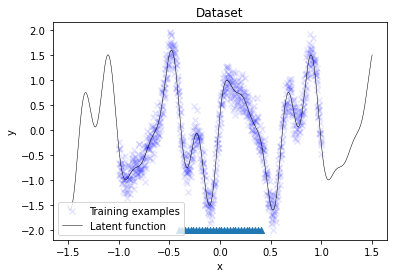

In [5]:
plt.scatter(X, y, label='Training examples', marker='x', color='blue', alpha=0.1)
plt.scatter(X_m, y.min() * jnp.ones(len(X_m)), marker='^')
plt.plot(X_test, f_true, label='Latent function', c='k', lw=0.5)
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [6]:
from models.sparse_gpr import SGPRegressor

m = SGPRegressor(RBFKernel(1., 1., 0.1)).fit(X, y, n_inducing=30)
m.optimize(X_m, verbose=False)

print(m.k.ps)

[0.50023705 0.09080142 0.1       ]


In [7]:
mu_m_opt, A_m_opt, K_mm_inv = m.phi_opt()

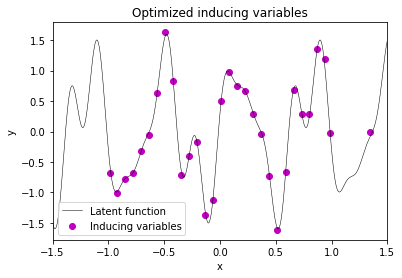

In [8]:
plt.plot(X_test, f_true, label='Latent function', c='k', lw=0.5)
plt.scatter(m.inducing_points, mu_m_opt, label='Inducing variables', c='m')
plt.title('Optimized inducing variables')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1.5, 1.5)
plt.legend();

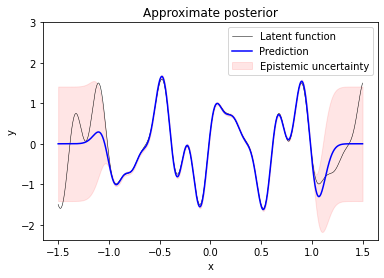

In [9]:
f_test, f_test_cov = m.predict(X_test)
f_test_var = np.diag(f_test_cov)
f_test_std = np.sqrt(f_test_var)

plt.plot(X_test, f_true, label='Latent function', c='k', lw=0.5)
plt.plot(X_test, f_test, label='Prediction', c='b')
plt.fill_between(X_test.ravel(), 
                 f_test.ravel() + 2 * f_test_std, 
                 f_test.ravel() - 2 * f_test_std,
                 label='Epistemic uncertainty',
                 color='r', alpha=0.1)
plt.title('Approximate posterior')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(None, 3.0)
plt.legend();

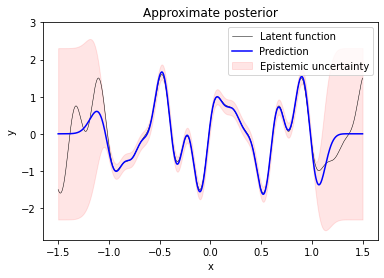

In [10]:
from models.gpr import GPRegressor

m = GPRegressor(RBFKernel(1., 1., 0.1)).fit(X, y).optimize()
m.k.ps = m.k.ps.at[2].set(0.1)

f_test, f_test_cov = m.predict(X_test)
f_test_var = np.diag(f_test_cov)
f_test_std = np.sqrt(f_test_var)

plt.plot(X_test, f_true, label='Latent function', c='k', lw=0.5)
plt.plot(X_test, f_test, label='Prediction', c='b')
plt.fill_between(X_test.ravel(), 
                 f_test.ravel() + 2 * f_test_std, 
                 f_test.ravel() - 2 * f_test_std,
                 label='Epistemic uncertainty',
                 color='r', alpha=0.1)
plt.title('Approximate posterior')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(None, 3.0)
plt.legend();